# Practica 9

### Dependencias

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from matplotlib import cm
from formulaic import Formula
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from time import time
import logging
import os

# Estas dos lineas son para silenciar las advertencias de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR)
import tensorflow as tf
import keras

from tf_regressor import Regressor, train_test_split_scale_center


### Ejercicio 1

In [19]:
data = pd.read_csv("../../Datasets/casos_coronavirus.csv")

data["DiasTranscuridos"] = np.arange(len(data))

data

,fecha,confirmados_Nuevos,DiasTranscuridos
0,3-3-2020,1,0
1,4-3-2020,0,1
2,5-3-2020,1,2
3,6-3-2020,6,3
4,7-3-2020,0,4
...,...,...,...
91,2-6-2020,904,91
92,3-6-2020,949,92
93,4-6-2020,929,93
94,5-6-2020,840,94


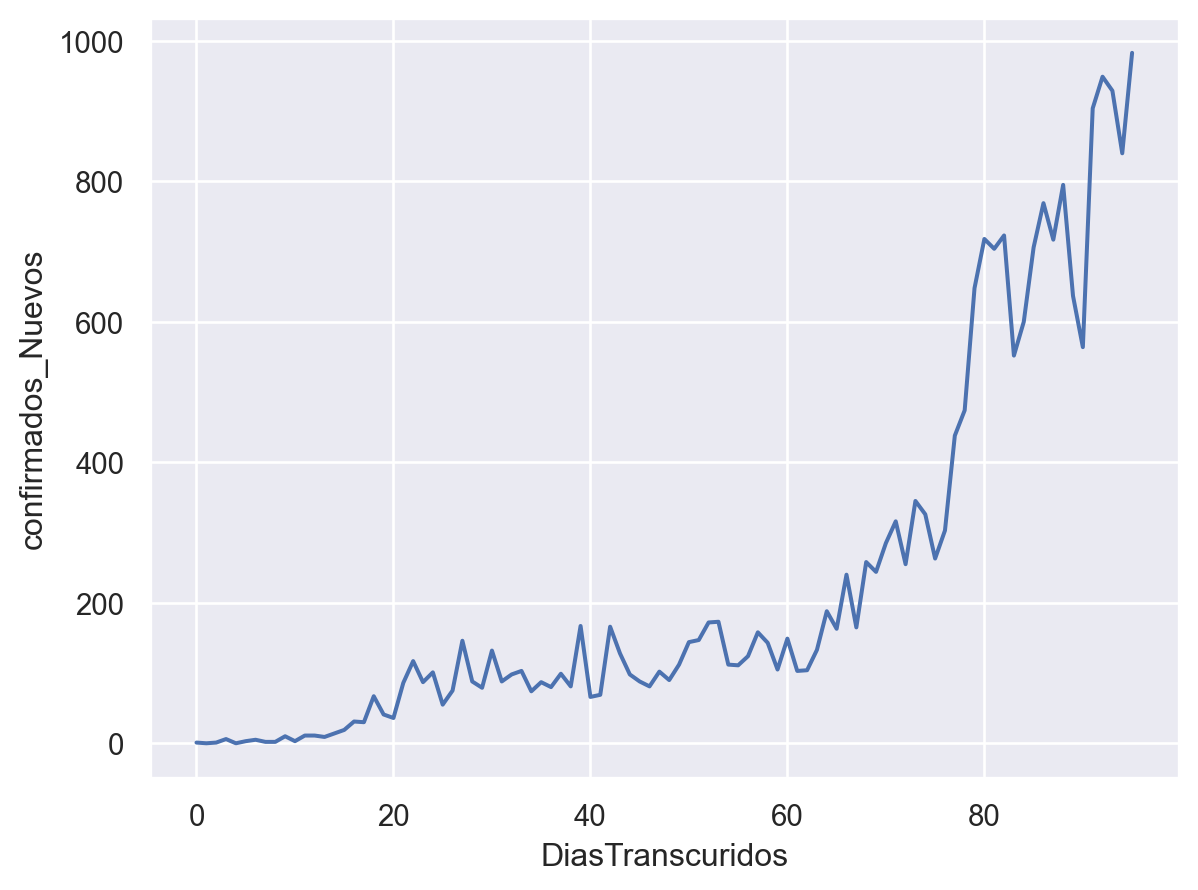

In [20]:
so.Plot(data=data, x="DiasTranscuridos", y="confirmados_Nuevos").add(so.Line())

## Punto C

Primero separamos los datos para todos los puntos

In [21]:
X = data["DiasTranscuridos"]
y = data["confirmados_Nuevos"]
X_train, X_test, y_train, y_test = train_test_split_scale_center(X, y, 
                                                                 transform_y=True,  # Normalizamos y también 
                                                                 center=False,      # No centramos los datos
                                                                 test_size=0.2,     # 20% de los datos para testeo
                                                                 random_state=11)   # Semilla para datos de testeo

### Regresiones No Lineales

#### Punto i

In [22]:
f = lambda x, w, b: b + w[0]*x + w[1]*x**2

model = Regressor()

# Volvamos a entrenar el modelo con pesos y bias iniciales aleatorios
model.add_f(f,                 # funcion del modelo
            dim_w= 2,           # dimension de w
            random_state=2077,  # semilla para selecciones aleatorias
            opt='gd'            # Especificamos que usamos descenso por gradiente
            )

# Entrenamos el modelo con los conjuntos de entrenamiento
model.fit_(X_train, y_train,       # Conjuntos de entrenamiento 
           epochs=200,              # Cantidad de epocas
           validation_split=0.2,    # 20% de datos para validacion
           learning_rate=0.2)      # Learning rate inicial   

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.2160 - val_loss: 0.2778
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1952 - val_loss: 0.2519
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1765 - val_loss: 0.2284
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1597 - val_loss: 0.2071
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1446 - val_loss: 0.1878
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1310 - val_loss: 0.1705
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1188 - val_loss: 0.1549
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1078 - val_loss: 0.1408
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0980 - val_loss: 0.1281
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0891 - val_loss: 0.1166
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0811 - val_loss: 0.1063
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0739 - val_l

In [23]:
# Imprimimos pesos y bias obtenidos con el entrenamiento
print(model.weights_)
print(model.bias_)

[-0.18387638  0.9667142 ]
0.0014839018


In [24]:
#Calculamos el MSE en el conjunto de testeo
model.evaluate(X_test.to_numpy(), y_test.to_numpy(),        # A TensorFlow no le gustan los DataFrame de pandas 
               return_dict=True,                            # Devuelve un diccionario (por si usamos mas de una métrica)
               verbose=0,                                   # No imprima en pantalla el procedimiento de evaluación
               batch_size=len(y_test))

{'loss': 0.011134576052427292}

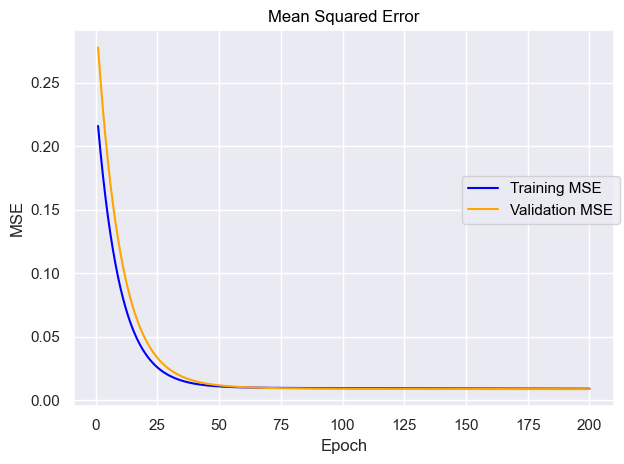

In [25]:
# Graficamos la evolución del MSE
model.plot_loss()

#### punto iii

In [26]:
f = lambda x, w, b: b +  w*np.e**x

model = Regressor()

# Volvamos a entrenar el modelo con pesos y bias iniciales aleatorios
model.add_f(f,                 # funcion del modelo
            dim_w= 1,           # dimension de w
            random_state=2077,  # semilla para selecciones aleatorias
            opt='gd'            # Especificamos que usamos descenso por gradiente
            )

# Entrenamos el modelo con los conjuntos de entrenamiento
model.fit_(X_train, y_train,       # Conjuntos de entrenamiento 
           epochs=200,              # Cantidad de epocas
           validation_split=0.2,    # 20% de datos para validacion
           learning_rate=0.2)      # Learning rate inicial   

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.9984 - val_loss: 0.4002
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4994 - val_loss: 0.5236
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2969 - val_loss: 0.2059
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2121 - val_loss: 0.2969
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1743 - val_loss: 0.1893
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1553 - val_loss: 0.2266
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1439 - val_loss: 0.1833
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1358 - val_loss: 0.1940
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1292 - val_loss: 0.1733
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1232 - val_loss: 0.1731
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1178 - val_loss: 0.1610
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1127 - val_l

In [27]:
# Imprimimos pesos y bias obtenidos con el entrenamiento
print(model.weights_)
print(model.bias_)

[0.4637751]
-0.5610254


In [28]:
#Calculamos el MSE en el conjunto de testeo
model.evaluate(X_test.to_numpy(), y_test.to_numpy(),        # A TensorFlow no le gustan los DataFrame de pandas 
               return_dict=True,                            # Devuelve un diccionario (por si usamos mas de una métrica)
               verbose=0,                                   # No imprima en pantalla el procedimiento de evaluación
               batch_size=len(y_test))

{'loss': 0.01751246675848961}

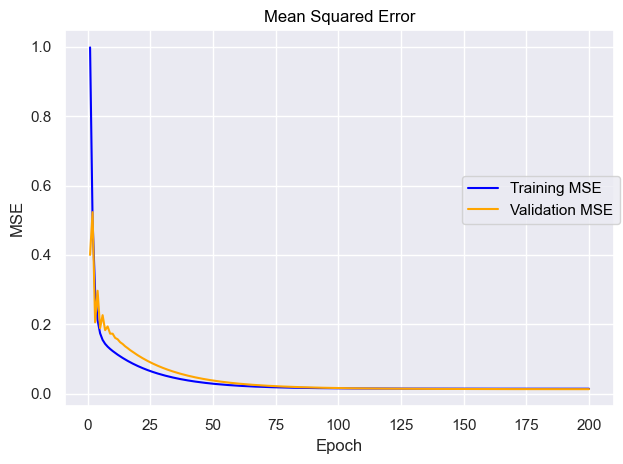

In [29]:
# Graficamos la evolución del MSE
model.plot_loss()

### Regresiones No Lineales

#### punto ii

In [30]:
f = lambda x, w, b: b + w[0]*np.e**(w[1]*x)

print(f)

model = Regressor()

# Volvamos a entrenar el modelo con pesos y bias iniciales aleatorios
model.add_f(f,                 # funcion del modelo
            dim_w= 2,           # dimension de w
            random_state=2077,  # semilla para selecciones aleatorias
            opt='gd'            # Especificamos que usamos descenso por gradiente
            )

# Entrenamos el modelo con los conjuntos de entrenamiento
model.fit_(X_train, y_train,       # Conjuntos de entrenamiento 
           epochs=200,              # Cantidad de epocas
           validation_split=0.2,    # 20% de datos para validacion
           learning_rate=0.2)      # Learning rate inicial   

<function <lambda> at 0x000001A4715E2DE0>
Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.1574 - val_loss: 0.1190
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0685 - val_loss: 0.1080
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0658 - val_loss: 0.1052
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0648 - val_loss: 0.1036
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0639 - val_loss: 0.1021
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0630 - val_loss: 0.1008
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0621 - val_loss: 0.0995
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0613 - val_loss: 0.0982
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0605 - val_loss: 0.0970
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0597 - val_loss: 0.0957
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0589 - val_loss: 0.0946
Epoch 12/200
1/1 ━━━━━━━━━━━━━━

In [31]:
# Imprimimos pesos y bias obtenidos con el entrenamiento
print(model.weights_)
print(model.bias_)

[-1.1314656  -0.84083354]
1.000448


In [32]:
#Calculamos el MSE en el conjunto de testeo
model.evaluate(X_test.to_numpy(), y_test.to_numpy(),        # A TensorFlow no le gustan los DataFrame de pandas 
               return_dict=True,                            # Devuelve un diccionario (por si usamos mas de una métrica)
               verbose=0,                                   # No imprima en pantalla el procedimiento de evaluación
               batch_size=len(y_test))

{'loss': 0.033386580646038055}

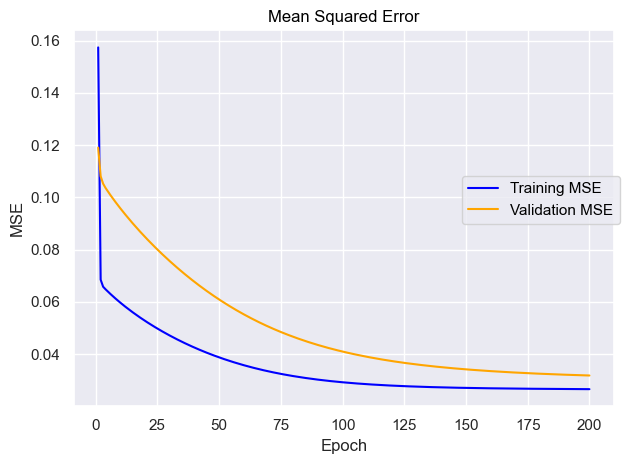

In [33]:
# Graficamos la evolución del MSE
model.plot_loss()

### Ejercicio 2

In [34]:
titanic = sns.load_dataset('titanic')

data = titanic.drop("deck", axis = 1)

data = data.dropna().reset_index(inplace = True)

data

<Axes: ylabel='fare'>

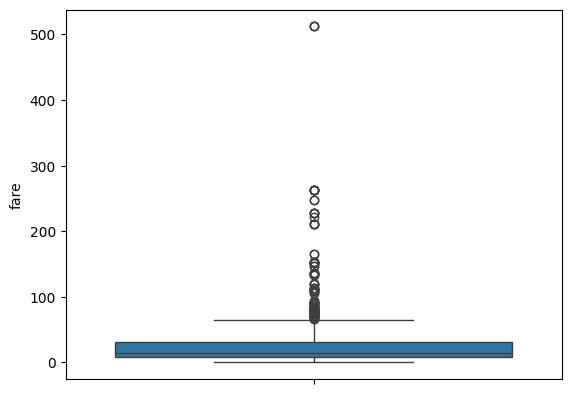

In [35]:
sns.boxplot(data=titanic,y="fare")

In [36]:
titanic[titanic["fare"] > 200]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
377,0,1,male,27.0,0,2,211.5000,C,First,man,True,C,Cherbourg,no,False
380,1,1,female,42.0,0,0,227.5250,C,First,woman,False,NaN,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
